In [53]:
!python3 -m pip uninstall matplotlib
!pip3 install osmnx networkx pandas
!pip install matplotlib==3.1.3
!pip install folium

Found existing installation: matplotlib 3.1.3
Uninstalling matplotlib-3.1.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
ERROR: pip's dependency resolver does not currently take in

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import osmnx as ox
import pandas as pd
import networkx as nx
import warnings
import matplotlib
warnings.filterwarnings('ignore')

### 地図データの取得

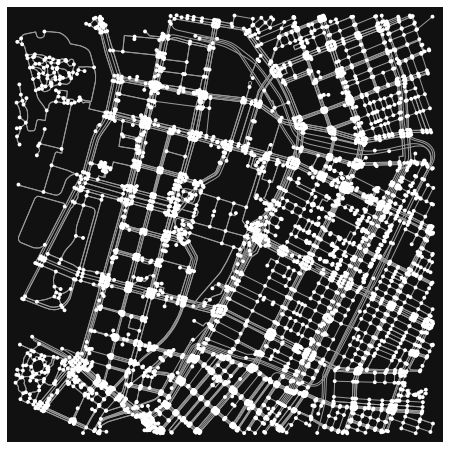

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe962cf9f90>)

In [29]:
# 多重有向グラフ
G = ox.graph_from_point(center_point=(35.6809591, 139.7673068), network_type='all', dist=1000)
# 多重無向グラフ
Gu = ox.utils_graph.get_undirected(G)
# 表示
ox.plot_graph(G, ax=None, figsize=(8, 8), bgcolor='#111111', node_color='w', node_size=15, node_alpha=None, node_edgecolor='none', node_zorder=1, edge_color='#999999', edge_linewidth=1, edge_alpha=None, show=True, close=False, save=False, filepath=None, dpi=300, bbox=None)

In [42]:
nodes = ox.graph_to_gdfs(G, edges=False)
nodes.head()

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
31254349,35.672816,139.772291,3,NaN,NaN,POINT (139.77229 35.67282)
31254353,35.671989,139.772236,3,13,motorway_junction,POINT (139.77224 35.67199)
31255183,35.674064,139.770092,4,NaN,NaN,POINT (139.77009 35.67406)
31255186,35.673667,139.771588,4,NaN,traffic_signals,POINT (139.77159 35.67367)
31255189,35.677164,139.773002,3,NaN,NaN,POINT (139.77300 35.67716)


In [43]:
edges = ox.graph_to_gdfs(G, nodes=False)
edges.head()

osmid  oneway lanes  ref       name  \
u        v          key                                            
31254349 5658513188 0    593037725    True     1   C1  首都高速都心環状線   
         5112070770 0      4849052    True     1  NaN        NaN   
31255183 5109258255 0    856631371    True   NaN  NaN        NaN   
         5109258252 0    968060910   False   NaN  NaN      銀座桜通り   
         5109258245 0    968060910   False   NaN  NaN      銀座桜通り   

                               highway maxspeed   length  bearing  \
u        v          key                                             
31254349 5658513188 0         motorway       50   39.849     20.6   
         5112070770 0    motorway_link       40  234.710      7.1   
31255183 5109258255 0     unclassified      NaN    6.354    213.8   
         5109258252 0         tertiary      NaN    5.552    301.0   
         5109258245 0         tertiary      NaN    4.917    112.2   

                                                                  geometry  \
u        v          key                                                      
31254349 5658513188 0    LINESTRING (139.77229 35.67282, 139.77245 35.6...   
         5112070770 0    LINESTRING (139.77229 35.67282, 139.77243 35.6...   
31255183 5109258255 0    LINESTRING (139.77009 35.67406, 139.77005 35.6...   
         5109258252 0    LINESTRING (139.77009 35.67406, 139.77004 35.6...   
         5109258245 0    LINESTRING (139.77009 35.67406, 139.77014 35.6...   

                        bridge access service tunnel width  
u        v          key                                     
31254349 5658513188 0      NaN    NaN     NaN    NaN   NaN  
         5112070770 0      NaN    NaN     NaN    NaN   NaN  
31255183 5109258255 0      NaN    NaN     NaN    NaN   NaN  
         5109258252 0      NaN    NaN     NaN    NaN   NaN  
         5109258245 0      NaN    NaN     NaN    NaN   NaN

### bearing module
エッジ（道路）の方角を計算

In [31]:
# ベアリングの追加
# 各エッジのベアリングを計算（北基準）
ox.bearing.add_edge_bearings(G, precision=1)
ox.bearing.add_edge_bearings(Gu, precision=1) # 無向グラフ

In [32]:
# エントロピーの計算
ox.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None)

3.298490072973756

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.PolarAxesSubplot at 0x7fe966bd8410>)

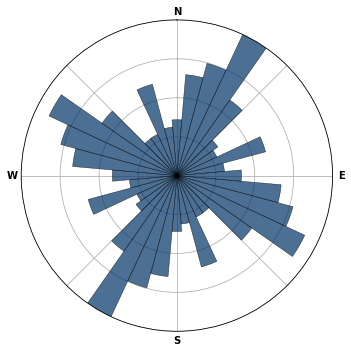

In [33]:
# 双方向エッジのベアリングの極ヒストグラム
ox.bearing.plot_orientation(Gu, num_bins=36, min_length=0, weight=None, ax=None, figsize=(5, 5), area=True, color='#003366', edgecolor='k', linewidth=0.5, alpha=0.7, title=None, title_y=1.05, title_font=None, xtick_font=None)

道路の向いている方角を知ることで都市の複雑さなどがわかる
https://gigazine.net/news/20180714-city-street-orientations/

In [38]:
# ２点間の角度計算（北が０度）２点の緯度軽度を指定する
lat1 = 35.6809591
lng1 = 139.7673068
lat2 = 35.6810591
lng2 = 139.7674068
ox.bearing.calculate_bearing(lat1, lng1, lat2, lng2)

39.0861291649278

### distance module
距離の計算

In [36]:
# 各辺の入射ノード間の大円距離を計算, 長さ属性の追加
# graph.graph_from_x 関数によって自動的に実行されているらしい
ox.distance.add_edge_lengths(G, precision=3)

In [39]:
# 2つの点の座標間、または点の座標の配列間のユークリッド距離を計算
# y1 (float or numpy.array of float) – first point’s y coordinate
# x1 (float or numpy.array of float) – first point’s x coordinate
# y2 (float or numpy.array of float) – second point’s y coordinate
# x2 (float or numpy.array of float) – second point’s x coordinate
ox.distance.euclidean_dist_vec(y1= 35.6809591, x1 = 139.7673068, y2 = 35.6810591, x2 = 139.7674068)

0.0001414213562369799

In [40]:
# 2つの点の座標間、または点の座標の配列間の大円距離を計算
lat1 = 35.6809591
lng1 = 139.7673068
lat2 = 35.6810591
lng2 = 139.7674068
ox.distance.great_circle_vec(lat1, lng1, lat2, lng2, earth_radius=6371009)

14.325594375002154

In [44]:
# エッジへの近似
# 指定した点から最も近いエッジの(u, v, key)を返す
ox.distance.nearest_edges(G, Y=35.6809591, X=139.7673068, interpolate=None, return_dist=False)

(567877350, 6538495149, 0)

In [46]:
# ノードへの近似 
# 指定した点から最も近いノードのosmidを返す
ox.distance.nearest_nodes(G, Y=35.6809591, X=139.7673068, return_dist=False)

6397158022

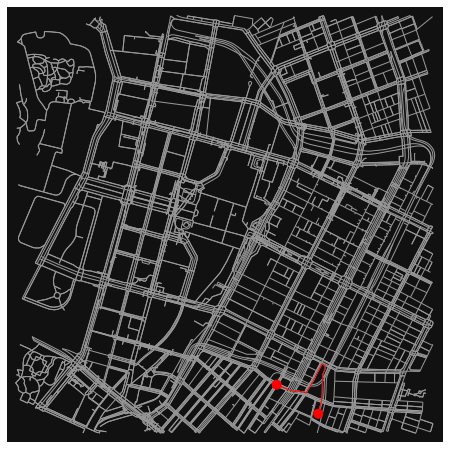

In [45]:
# networkxを用いた最短経路の探索
# ２点のosmidを指定する
path = nx.shortest_path(G, 31254349, 31255183)
fig, ax = ox.plot_graph_route(G, path, node_size = 0, route_linewidth = 1, route_alpha = 1)

[31254349, 5112070770, 5112070760, 5112070799, 5112070801, 5109267507, 5109267506, 5109267504, 1070638366, 1070638476, 1070638168, 1070638350, 5109267501, 5109258245, 31255183]


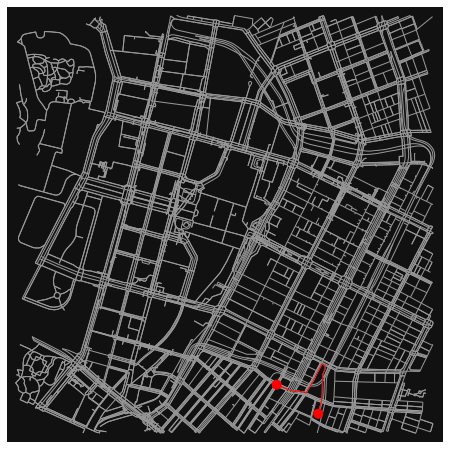

In [47]:
# osmnxを用いた最短経路検索
# CPUコア数を指定して並列化が可能
path = ox.distance.shortest_path(G, orig=31254349, dest=31255183, weight='length', cpus=2)
print(path)
fig, ax = ox.plot_graph_route(G, path, node_size = 0, route_linewidth = 1, route_alpha = 1)

In [52]:
# k本の最短経路経路を見つける, ここでは２本
path1,path2 = ox.distance.k_shortest_paths(G, orig=31254349, dest=31255183, k=2, weight='length')
# 比較（微妙に違う）
print(path1)
print(path2)

[31254349, 5112070770, 5112070760, 5112070799, 5112070801, 5109267507, 5109267506, 5109267504, 1070638366, 1070638476, 1070638168, 1070638350, 5109267501, 5109258245, 31255183]
[31254349, 5112070770, 5112070760, 5112070799, 5112070801, 5109267507, 5112070803, 1984363771, 5109267504, 1070638366, 1070638476, 1070638168, 1070638350, 5109267501, 5109258245, 31255183]


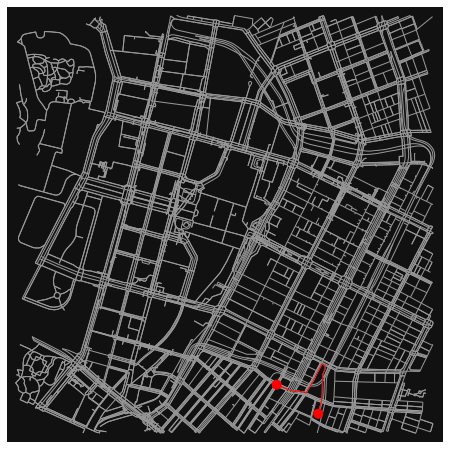

In [50]:
# １本目
fig, ax = ox.plot_graph_route(G, path1, node_size = 0, route_linewidth = 1, route_alpha = 1)

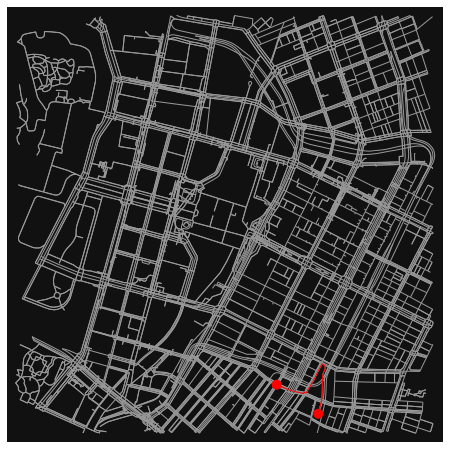

In [49]:
# ２本目
fig, ax = ox.plot_graph_route(G, path2, node_size = 0, route_linewidth = 1, route_alpha = 1)

### downloader module

In [ ]:
# Nominatim APIにHTTP GETリクエストを送信し、JSONレスポンスを返す
# ox.downloader.nominatim_request(params, request_type='search', pause=1, error_pause=60)
# オーバーパスAPIにHTTP POSTリクエストを送信し、JSONレスポンスを返す
# ox.downloader.overpass_request(data, pause=None, error_pause=60)

### elevation module

In [ ]:
# グラフの各エッジに高さ属性を追加
# Google Maps Elevation APIを使用しており、APIキーが必要
# ox.elevation.add_node_elevations_google(G, api_key, max_locations_per_batch=350, pause_duration=0, precision=3)
# ファイルを指定して追加することも可能
# ox.elevation.add_node_elevations_raster(G, filepath, band=1, cpus=None)
# ox.elevation.add_edge_grades(G, add_absolute=True, precision=3)

folium module

In [54]:
# pip install foliumを実行しておく
# ウェブマップへのプロット
ox.folium.plot_graph_folium(G, graph_map=None, popup_attribute=None, tiles='cartodbpositron', zoom=1, fit_bounds=True, edge_color=None, edge_width=None, edge_opacity=None)

Output hidden; open in https://colab.research.google.com to view.

In [55]:
# ルートの表示, routeに先程のpath（最短経路探索で求めたパス）を指定している
ox.folium.plot_route_folium(G, route=path, route_map=None, popup_attribute=None, tiles='cartodbpositron', zoom=1, fit_bounds=True, route_color=None, route_width=None, route_opacity=None)

### geocoder module

In [57]:
# Nominatim APIから名前またはOSM IDで地名をGeoDataFrameとして取得
# by_osmid=Trueを設定すると、OSM IDでのクエリとなる
# Nominatimのフォーマット：ノード（N）、ウェイ（W）、リレーション（R）（いずれかを指定）
ox.geocoder.geocode_to_gdf(query = "W593037725", which_result=None, by_osmid=True, buffer_dist=None)

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"LINESTRING (139.77191 35.67159, 139.77198 35.6...",35.673151,35.671588,139.772446,139.771913,223613582,way,593037725,35.672268,139.772105,"Circle 1, Ginza 1-chome, Shintomi 2-chome, Chu...",highway,motorway,0.1


In [58]:
# クエリ文字列を(lat, lng)にジオコーディングできる
query = "東京駅"
query = ox.geocoder.geocode(query)
print(query)

(35.677984, 139.7653884)


### geometries module
指定された住所、緯度経度、場所から要素を取得

In [59]:
# 住所を指定
# 与えられたタグを満たす全ての要素を取得する
address = "大手町"
tags = {'building': True}
geometry = ox.geometries.geometries_from_address(address, tags, dist=1000)
geometry.head()

building                  name  \
element_type osmid                                       
node         1420766287   public              日本政策金融公庫   
             1420766923   public                会計センター   
             1420771614   public          国家公務員共済組合連合会   
             1420771624   public         国民生活金融公庫大手町支店   
             1420771713   public  国立科学博物館産業技術史資料情報センター   

                                                                   name:en  \
element_type osmid                                                           
node         1420766287                          Japan Finance Corporation   
             1420766923                                  Accounting Center   
             1420771614  National Public Officers Mutual Aid Associatio...   
             1420771624                                                NaN   
             1420771713                                                NaN   

                                                                      note  \
element_type osmid                                                           
node         1420766287  National-Land Numerical Information (Public Fa...   
             1420766923  National-Land Numerical Information (Public Fa...   
             1420771614  National-Land Numerical Information (Public Fa...   
             1420771624  National-Land Numerical Information (Public Fa...   
             1420771713  National-Land Numerical Information (Public Fa...   

                                            note:ja source  \
element_type osmid                                           
node         1420766287  国土数値情報（公共施設データ）平成19年　国土交通省   KSJ2   
             1420766923  国土数値情報（公共施設データ）平成19年　国土交通省   KSJ2   
             1420771614  国土数値情報（公共施設データ）平成19年　国土交通省   KSJ2   
             1420771624  国土数値情報（公共施設データ）平成19年　国土交通省   KSJ2   
             1420771713  国土数値情報（公共施設データ）平成19年　国土交通省   KSJ2   

                                                                source_ref  \
element_type osmid                                                           
node         1420766287  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...   
             1420766923  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...   
             1420771614  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...   
             1420771624  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...   
             1420771713  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...   

                                           geometry name:ja name:ja_kana  ...  \
element_type osmid                                                        ...   
node         1420766287  POINT (139.76504 35.68835)     NaN          NaN  ...   
             1420766923  POINT (139.75527 35.69317)     NaN          NaN  ...   
             1420771614  POINT (139.75527 35.69328)     NaN          NaN  ...   
             1420771624  POINT (139.76493 35.68833)     NaN          NaN  ...   
             1420771713  POINT (139.77296 35.68681)     NaN          NaN  ...   

                        religion craft museum ways type short_name name:de  \
element_type osmid                                                           
node         1420766287      NaN   NaN    NaN  NaN  NaN        NaN     NaN   
             1420766923      NaN   NaN    NaN  NaN  NaN        NaN     NaN   
             1420771614      NaN   NaN    NaN  NaN  NaN        NaN     NaN   
             1420771624      NaN   NaN    NaN  NaN  NaN        NaN     NaN   
             1420771713      NaN   NaN    NaN  NaN  NaN        NaN     NaN   

                        name:it roof:height roof:orientation  
element_type osmid                                            
node         1420766287     NaN         NaN              NaN  
             1420766923     NaN         NaN              NaN  
             1420771614     NaN         NaN              NaN  
             1420771624     NaN         NaN              NaN  
             1420771713     NaN         NaN     

In [60]:
# 緯度経度で指定
north = 35.677984
east = 139.7654884
south = 35.678084
west = 139.7653884
tags = {'building': True}
geometry = ox.geometries.geometries_from_bbox(north, south, east, west, tags)
geometry.head()

,,geometry,nodes,building
element_type,osmid,,,
way,1062006264,"POLYGON ((139.76539 35.67800, 139.76539 35.677...","[9756668634, 9756668638, 9756668635, 975666863...",yes


In [ ]:
# クエリでの指定
query = "東京駅"
geometry = ox.geometries.geometries_from_place(query, tags, which_result=None, buffer_dist=500)
geometry.head()

/Users/koutarou/.pyenv/versions/3.7.6/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amenity building                  name  \
element_type osmid                                                    
node         1423801221  post_office   public  商工組合中央金庫熊本支店;熊本城東郵便局   
             1423805006          NaN   public            日本郵政公社九州支社   
             1423807820          NaN   public           熊本刑務所京町拘置支所   
             1423808159          NaN   public               熊本地方検察庁   
             1423808215          NaN   public         熊本地方検察庁熊本区検察庁   

                                                                      note  \
element_type osmid                                                           
node         1423801221  National-Land Numerical Information (Public Fa...   
             1423805006  National-Land Numerical Information (Public Fa...   
             1423807820  National-Land Numerical Information (Public Fa...   
             1423808159  National-Land Numerical Information (Public Fa...   
             1423808215  National-Land Numerical Information (Public Fa...   

                                            note:ja source  \
element_type osmid                                           
node         1423801221  国土数値情報（公共施設データ）平成19年　国土交通省   KSJ2   
             1423805006  国土数値情報（公共施設データ）平成19年　国土交通省   KSJ2   
             1423807820  国土数値情報（公共施設データ）平成19年　国土交通省   KSJ2   
             1423808159  国土数値情報（公共施設データ）平成19年　国土交通省   KSJ2   
             1423808215  国土数値情報（公共施設データ）平成19年　国土交通省   KSJ2   

                                                                source_ref  \
element_type osmid                                                           
node         1423801221  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...   
             1423805006  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...   
             1423807820  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...   
             1423808159  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...   
             1423808215  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...   

                          wikidata   wikipedia                    geometry  \
element_type osmid                                                           
node         1423801221  Q11567972  ja:熊本城東郵便局  POINT (130.70908 32.80421)   
             1423805006        NaN         NaN  POINT (130.70900 32.80457)   
             1423807820        NaN         NaN  POINT (130.70644 32.81112)   
             1423808159        NaN         NaN  POINT (130.70577 32.81118)   
             1423808215        NaN         NaN  POINT (130.70577 32.81118)   

                         ... brand:en brand:ja brand:wikidata brand:wikipedia  \
element_type osmid       ...                                                    
node         1423801221  ...      NaN      NaN            NaN             NaN   
             1423805006  ...      NaN      NaN            NaN             NaN   
             1423807820  ...      NaN      NaN            NaN             NaN   
             1423808159  ...      NaN      NaN            NaN             NaN   
             1423808215  ...      NaN      NaN            NaN             NaN   

                        addr:quarter service_times toilets:wheelchair  \
element_type osmid                                                      
node         1423801221          NaN           NaN                NaN   
             1423805006          NaN           NaN                NaN   
             1423807820          NaN           NaN                NaN   
             1423808159          NaN           NaN                NaN   
             1423808215          NaN           NaN                NaN   

                        wheelchair ways type  
element_type osmid                            
node         1423801221        NaN  NaN  NaN  
             1423805006        NaN  NaN  NaN  
             1423807820        NaN  NaN  NaN  
             1423808159        NaN  NaN  NaN  
             1423808215        NaN  NaN  NaN  

[5 rows x 58 columns]

In [61]:
# 中心と距離を指定
center_point=(35.677984, 139.7653884)
geometry = ox.geometries.geometries_from_point(center_point, tags, dist=1000)
geometry.head()

geometry                  name  \
element_type osmid                                                          
node         1420767835  POINT (139.75553 35.67146)              公営企業金融公庫   
             1420771713  POINT (139.77296 35.68681)  国立科学博物館産業技術史資料情報センター   
             1420771746  POINT (139.76568 35.67635)              国際観光振興機構   
             1420782957  POINT (139.77368 35.67134)            東京国税局京橋税務署   
             1420785260  POINT (139.77368 35.67135)         東京都主税局中央都税事務所   

                                                                   name:en  \
element_type osmid                                                           
node         1420767835  Japan Finance Corporation for Municipal Enterp...   
             1420771713                                                NaN   
             1420771746                Japan National Tourism Organization   
             1420782957                                                NaN   
             1420785260                                                NaN   

                        name:es  ref building  \
element_type osmid                              
node         1420767835     NaN  NaN   public   
             1420771713     NaN  NaN   public   
             1420771746     NaN  NaN   public   
             1420782957     NaN  NaN   public   
             1420785260     NaN  NaN   public   

                                                                      note  \
element_type osmid                                                           
node         1420767835  National-Land Numerical Information (Public Fa...   
             1420771713  National-Land Numerical Information (Public Fa...   
             1420771746  National-Land Numerical Information (Public Fa...   
             1420782957  National-Land Numerical Information (Public Fa...   
             1420785260  National-Land Numerical Information (Public Fa...   

                                            note:ja source  \
element_type osmid                                           
node         1420767835  国土数値情報（公共施設データ）平成19年　国土交通省   KSJ2   
             1420771713  国土数値情報（公共施設データ）平成19年　国土交通省   KSJ2   
             1420771746  国土数値情報（公共施設データ）平成19年　国土交通省   KSJ2   
             1420782957  国土数値情報（公共施設データ）平成19年　国土交通省   KSJ2   
             1420785260  国土数値情報（公共施設データ）平成19年　国土交通省   KSJ2   

                                                                source_ref  \
element_type osmid                                                           
node         1420767835  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...   
             1420771713  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...   
             1420771746  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...   
             1420782957  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...   
             1420785260  http://nlftp.mlit.go.jp/ksj/jpgis/datalist/Ksj...   

                         ... shelter_type bicycle_parking covered craft ways  \
element_type osmid       ...                                                   
node         1420767835  ...          NaN             NaN     NaN   NaN  NaN   
             1420771713  ...          NaN             NaN     NaN   NaN  NaN   
             1420771746  ...          NaN             NaN     NaN   NaN  NaN   
             1420782957  ...          NaN             NaN     NaN   NaN  NaN   
             1420785260  ...          NaN             NaN     NaN   NaN  NaN   

                        type roof:height roof:orientation government  \
element_type osmid                                                     
node         1420767835  NaN         NaN              NaN        NaN   
             1420771713  NaN         NaN              NaN        NaN   
             1420771746  NaN         NaN              NaN        NaN   
             1420782957  NaN         NaN              NaN        NaN   
             1420785260  NaN         NaN              NaN        NaN   

                 

In [ ]:
# osmnx.geometries.geometries_from_polygon(polygon, tags)

In [ ]:
# OSMフォーマットのXMLファイルからジオメトリのGeoDataFrameを作成
# osmnx.geometries.geometries_from_xml(filepath, polygon=None, tags=None)

### graph module（グラフの取得）
一番最初に実行したのは中心の座標を指定するgraph_from_pointだが、他にも住所など様々な手法で指定可能

In [ ]:
# 一番最初に実行したのがgraph module
# osmnx.graph.graph_from_address(address, dist=1000, dist_type='bbox', network_type='all_private', simplify=True, retain_all=False, truncate_by_edge=False, return_coords=False, clean_periphery=True, custom_filter=None)
# osmnx.graph.graph_from_bbox(north, south, east, west, network_type='all_private', simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=True, custom_filter=None)
# osmnx.graph.graph_from_place(query, network_type='all_private', simplify=True, retain_all=False, truncate_by_edge=False, which_result=None, buffer_dist=None, clean_periphery=True, custom_filter=None)
# osmnx.graph.graph_from_point(center_point, dist=1000, dist_type='bbox', network_type='all_private', simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=True, custom_filter=None)
# osmnx.graph.graph_from_polygon(polygon, network_type='all_private', simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=True, custom_filter=None)
# osmnx.graph.graph_from_xml(filepath, bidirectional=False, simplify=True, retain_all=False)

### io module


In [ ]:
# GraphMLファイルの読み込み
# osmnx.io.load_graphml(filepath, node_dtypes=None, edge_dtypes=None, graph_dtypes=None)
# グラフのノードやエッジをGeoPackageファイルのレイヤーとして保存
# osmnx.io.save_graph_geopackage(G, filepath=None, encoding='utf-8', directed=False)
# グラフをGraphMLファイルとして保存
# osmnx.io.save_graphml(G, filepath=None, gephi=False, encoding='utf-8')

### osm_xml module

In [ ]:
# グラフを OSM 形式の XML .osm ファイルとして保存
# osmnx.osm_xml.save_graph_xml(data, filepath=None, node_tags=['highway'], node_attrs=['id', 'timestamp', 'uid', 'user', 'version', 'changeset', 'lat', 'lon'], edge_tags=['highway', 'lanes', 'maxspeed', 'name', 'oneway'], edge_attrs=['id', 'timestamp', 'uid', 'user', 'version', 'changeset'], oneway=False, merge_edges=True, edge_tag_aggs=None)

### plot module

In [63]:
# matplotlibのcolormapからn個の色を取得(R, G, B, alpha)
ox.plot.get_colors(n=3, cmap='viridis', start=0.0, stop=1.0, alpha=1.0, return_hex=False)

[(0.267004, 0.004874, 0.329415, 1.0),
 (0.127568, 0.566949, 0.550556, 1.0),
 (0.993248, 0.906157, 0.143936, 1.0)]

In [64]:
# エッジ属性の値に基づいて色分け
ox.plot.get_edge_colors_by_attr(G, attr='length', num_bins=None, cmap='viridis', start=0, stop=1, na_color='none', equal_size=False)

31254349    5658513188  0    (0.278791, 0.062145, 0.386592, 1.0)
            5112070770  0    (0.237441, 0.305202, 0.541921, 1.0)
31255183    5109258255  0     (0.26851, 0.009605, 0.335427, 1.0)
            5109258252  0     (0.26851, 0.009605, 0.335427, 1.0)
            5109258245  0     (0.26851, 0.009605, 0.335427, 1.0)
                                            ...                 
9830938753  9830938740  0    (0.262138, 0.242286, 0.520837, 1.0)
            2475675103  0     (0.278826, 0.17549, 0.483397, 1.0)
9830938754  9830938753  0    (0.277134, 0.185228, 0.489898, 1.0)
            558689163   0    (0.283072, 0.130895, 0.449241, 1.0)
            9830938740  0    (0.278012, 0.180367, 0.486697, 1.0)
Length: 10984, dtype: object

In [67]:
# ノード属性の値に基づいて色分け
ox.plot.get_node_colors_by_attr(G, attr='street_count', num_bins=None, cmap='viridis', start=0, stop=1, na_color='none', equal_size=False)

31254349      (0.163625, 0.471133, 0.558148, 1.0)
31254353      (0.163625, 0.471133, 0.558148, 1.0)
31255183      (0.134692, 0.658636, 0.517649, 1.0)
31255186      (0.134692, 0.658636, 0.517649, 1.0)
31255189      (0.163625, 0.471133, 0.558148, 1.0)
                             ...                 
9826041182    (0.134692, 0.658636, 0.517649, 1.0)
9830938740    (0.163625, 0.471133, 0.558148, 1.0)
9830938742    (0.134692, 0.658636, 0.517649, 1.0)
9830938753    (0.163625, 0.471133, 0.558148, 1.0)
9830938754    (0.163625, 0.471133, 0.558148, 1.0)
Length: 4256, dtype: object

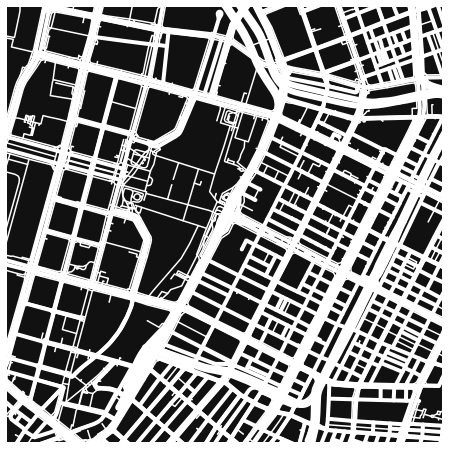

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe95dcf14d0>)

In [68]:
# グラフ、アドレス、座標を設定して表示
ox.plot.plot_figure_ground(G, address=None, point=None, dist=805, network_type='drive_service', street_widths=None, default_width=4, figsize=(8, 8), edge_color='w', smooth_joints=True)

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


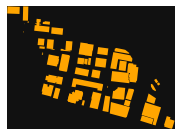

In [71]:
# GeoDataFrameをプロット
place = "大手町"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)
gdf.shape
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

In [70]:
# パスの表示（上で実行済み）
# osmnx.plot.plot_graph_route(G, route, route_color='r', route_linewidth=4, route_alpha=0.5, orig_dest_size=100, ax=None, **pg_kwargs)
# 複数パスの表示[path1, path2]
# osmnx.plot.plot_graph_routes(G, routes, route_colors='r', route_linewidths=4, **pgr_kwargs)

### simplification module
ノードの統一によるグラフの簡素化


/usr/local/lib/python3.7/dist-packages/osmnx/simplification.py:424: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = utils_graph.graph_to_gdfs(G, edges=False)["geometry"].buffer(tolerance).unary_union
/usr/local/lib/python3.7/dist-packages/osmnx/simplification.py:472: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


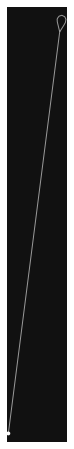

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe9604acc90>)

In [81]:
# 近隣のノードのクラスタを構成する交差点を統合
G_simplification = ox.simplification.consolidate_intersections(G, tolerance=2, rebuild_graph=True, dead_ends=False, reconnect_edges=True)
ox.plot_graph(G_simplification)

In [80]:
# 交差点や行き止まりではないすべてのノードを削除して、グラフのトポロジーを簡素化
# G_s = ox.simplification.simplify_graph(G, strict=True, remove_rings=True)
# エラーが出る、既に完了しているらしい（This graph has already been simplified, cannot simplify it again.）
# ox.plot_graph(G)

### speed module

In [91]:
# エッジの速度（km/h）を新しいspeed_kphエッジ属性としてグラフに追加
# デフォルトでは最大速度（maxspeed）の値となる、存在しない場合は全てのmaxspeedの平均値を入力する
ox.speed.add_edge_speeds(G, hwy_speeds=None, fallback=None, precision=1)

In [92]:
# エッジの移動時間（秒）を新しいtravel_timeエッジ属性としてグラフに追加
ox.speed.add_edge_travel_times(G, precision=1)

In [93]:
# 確かに追加されている（speed_kph, travel_time）
edges = ox.graph_to_gdfs(G, nodes=False)
edges.head()

osmid  oneway lanes  ref       name  \
u        v          key                                            
31254349 5658513188 0    593037725    True     1   C1  首都高速都心環状線   
         5112070770 0      4849052    True     1  NaN        NaN   
31255183 5109258255 0    856631371    True   NaN  NaN        NaN   
         5109258252 0    968060910   False   NaN  NaN      銀座桜通り   
         5109258245 0    968060910   False   NaN  NaN      銀座桜通り   

                               highway maxspeed   length  bearing  speed_kph  \
u        v          key                                                        
31254349 5658513188 0         motorway       50   39.849     20.6       50.0   
         5112070770 0    motorway_link       40  234.710      7.1       40.0   
31255183 5109258255 0     unclassified      NaN    6.354    213.8       30.0   
         5109258252 0         tertiary      NaN    5.552    301.0       40.4   
         5109258245 0         tertiary      NaN    4.917    112.2       40.4   

                         travel_time  \
u        v          key                
31254349 5658513188 0            2.9   
         5112070770 0           21.1   
31255183 5109258255 0            0.8   
         5109258252 0            0.5   
         5109258245 0            0.4   

                                                                  geometry  \
u        v          key                                                      
31254349 5658513188 0    LINESTRING (139.77229 35.67282, 139.77245 35.6...   
         5112070770 0    LINESTRING (139.77229 35.67282, 139.77243 35.6...   
31255183 5109258255 0    LINESTRING (139.77009 35.67406, 139.77005 35.6...   
         5109258252 0    LINESTRING (139.77009 35.67406, 139.77004 35.6...   
         5109258245 0    LINESTRING (139.77009 35.67406, 139.77014 35.6...   

                        bridge access service tunnel width  
u        v          key                                     
31254349 5658513188 0      NaN    NaN     NaN    NaN   NaN  
         5112070770 0      NaN    NaN     NaN    NaN   NaN  
31255183 5109258255 0      NaN    NaN     NaN    NaN   NaN  
         5109258252 0      NaN    NaN     NaN    NaN   NaN  
         5109258245 0      NaN    NaN     NaN    NaN   NaN

### stat module

In [94]:
# グラフの基本的幾何学的・位相的尺度を計算
ox.stats.basic_stats(G, area=None, clean_int_tol=None, clean_intersects=None)

{'circuity_avg': 0.9999999678852339,
 'edge_length_avg': 31.74501238164602,
 'edge_length_total': 348687.2159999999,
 'intersection_count': 3828,
 'k_avg': 5.161654135338346,
 'm': 10984,
 'n': 4256,
 'self_loop_proportion': 0.00015064778547755348,
 'street_length_avg': 33.11477146730929,
 'street_length_total': 219815.85299999907,
 'street_segment_count': 6638,
 'streets_per_node_avg': 3.1849154135338344,
 'streets_per_node_counts': {0: 0,
  1: 428,
  2: 6,
  3: 2222,
  4: 1560,
  5: 31,
  6: 9},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.10056390977443609,
  2: 0.0014097744360902255,
  3: 0.5220864661654135,
  4: 0.36654135338345867,
  5: 0.007283834586466165,
  6: 0.0021146616541353382}}

In [95]:
# 平均的な道路循環を計算するcircuity
# circuity: エッジの長さの合計を、エッジの端点間の直線距離の合計で割ったもの
ox.stats.circuity_avg(Gu)

1.0299169811445388

In [96]:
# グラフ内の各ノードに接続する物理的な道路の数を数えます
# graph.graph_from_x 関数によって自動的に実行される(strreet_count)
ox.stats.count_streets_per_node(G, nodes=None)

{31254349: 2,
 31254353: 1,
 31255183: 4,
 31255186: 4,
 31255189: 3,
 31255230: 3,
 206070127: 4,
 236104849: 4,
 236104869: 4,
 236104886: 3,
 236104926: 4,
 236621453: 4,
 236621597: 4,
 243827967: 4,
 243828041: 3,
 243828054: 3,
 243828103: 3,
 243828105: 3,
 251723916: 5,
 251723918: 6,
 251724499: 4,
 251726988: 4,
 251727100: 2,
 251727109: 2,
 251731821: 5,
 251731822: 5,
 254366661: 4,
 254366845: 3,
 254366846: 3,
 254366965: 4,
 255334831: 4,
 255337411: 5,
 255337412: 4,
 256426172: 2,
 256669806: 4,
 256669820: 3,
 256669905: 4,
 256671737: 4,
 257371953: 3,
 257544628: 4,
 257547228: 4,
 257547229: 4,
 257547230: 4,
 257547608: 4,
 257547609: 4,
 257547610: 4,
 257547611: 3,
 257555456: 1,
 257717879: 4,
 257717880: 4,
 257718000: 4,
 257718001: 4,
 258071544: 4,
 258071546: 4,
 258071908: 4,
 258768566: 4,
 258768641: 4,
 258770280: 1,
 260103151: 4,
 260413449: 4,
 260415912: 6,
 260417629: 3,
 260422934: 4,
 260996137: 5,
 261022522: 5,
 261022523: 6,
 261022524: 3,
 

In [97]:
# エッジの長さの合計
ox.stats.edge_length_total(G)

348687.2159999999

In [98]:
# 交差点の数を算出
# 交差点とは、少なくともmin_streets数のストリートが付随するノード
ox.stats.intersection_count(G, min_streets=2)

3828

In [99]:
# 自己ループである辺の割合を計算
# 自己ループとは、ノードuからノードvへのエッジで、u==vとなるもの
ox.stats.self_loop_proportion(Gu)

0.00015064778547755348

In [101]:
# グラフの総道路セグメント長
# 無向グラフを指定している（edge_length_totalとは異なる）
ox.stats.street_length_total(Gu)

226392.08699999968

In [102]:
# ノードごとのストリートの平均数を計算
ox.stats.streets_per_node_avg(G)

3.1849154135338344

In [103]:
# ノードごとのストリート数
ox.stats.streets_per_node_counts(G)

{0: 0, 1: 428, 2: 6, 3: 2222, 4: 1560, 5: 31, 6: 9}

In [104]:
# ノードあたりのストリートの割合
ox.stats.streets_per_node_proportions(G)

{0: 0.0,
 1: 0.10056390977443609,
 2: 0.0014097744360902255,
 3: 0.5220864661654135,
 4: 0.36654135338345867,
 5: 0.007283834586466165,
 6: 0.0021146616541353382}

truncate module

In [ ]:
# バウンディングボックスの外側にあるノードをすべて削除
# ox.truncate.truncate_graph_bbox(G, north, south, east, west, truncate_by_edge=False, retain_all=False, quadrat_width=0.05, min_num=3)
# source_nodeからあるネットワーク距離よりも遠いすべてのノードを削除
# ox.truncate.truncate_graph_dist(G, source_node, max_dist=1000, weight='length', retain_all=False)
# (Multi)Polygonの外側にあるノードをすべて削除
# ox.truncate.truncate_graph_polygon(G, polygon, retain_all=False, truncate_by_edge=False, quadrat_width=0.05, min_num=3)

### utils module

In [105]:
ox.utils.citation()

Citation:

Boeing, G. 2017. OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks. Computers, Environment and Urban Systems, 65, 126-139. https://doi.org/10.1016/j.compenvurbsys.2017.05.004

BibTeX entry for LaTeX users:

@article{boeing_osmnx_2017,
    title = {{OSMnx}: {New} {Methods} for {Acquiring}, {Constructing}, {Analyzing}, and {Visualizing} {Complex} {Street} {Networks}},
    volume = {65},
    doi = {10.1016/j.compenvurbsys.2017.05.004},
    number = {126-139},
    journal = {Computers, Environment and Urban Systems},
    author = {Boeing, Geoff},
    year = {2017}
}


In [107]:
# デフォルトのグローバル設定の値を設定
# ox.utils.config(all_oneway=False, bidirectional_network_types=['walk'], cache_folder='./cache', cache_only_mode=False, data_folder='./data', default_accept_language='en', default_access='["access"!~"private"]', default_crs='epsg:4326', default_referer='OSMnx Python package (https://github.com/gboeing/osmnx)', default_user_agent='OSMnx Python package (https://github.com/gboeing/osmnx)', elevation_provider='google', imgs_folder='./images', log_console=False, log_file=False, log_filename='osmnx', log_level=20, log_name='OSMnx', logs_folder='./logs', max_query_area_size=2500000000, memory=None, nominatim_endpoint='https://nominatim.openstreetmap.org/', nominatim_key=None, osm_xml_node_attrs=['id', 'timestamp', 'uid', 'user', 'version', 'changeset', 'lat', 'lon'], osm_xml_node_tags=['highway'], osm_xml_way_attrs=['id', 'timestamp', 'uid', 'user', 'version', 'changeset'], osm_xml_way_tags=['highway', 'lanes', 'maxspeed', 'name', 'oneway'], overpass_endpoint='https://overpass-api.de/api', overpass_rate_limit=True, overpass_settings='[out:json][timeout:{timeout}]{maxsize}', requests_kwargs={}, timeout=180, use_cache=True, useful_tags_node=['ref', 'highway'], useful_tags_way=['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction'])
# ロガーにメッセージを書き込み
# ox.utils.log(message=='tokyo', level=None, name=None, filename=None)
# 現在のタイムスタンプを文字列として取得
# ox.utils.ts(style='datetime', template=None)

### utils_geo module

In [108]:
# (lat, lng)の中心点からバウンディングボックスを作成
# (north, south, east, west)で表示
ox.utils_geo.bbox_from_point(point=(35.677984, 139.7653884), dist=1000, project_utm=False, return_crs=False)

(35.68697720335493, 35.668990796645076, 139.77645957835452, 139.7543172216455)

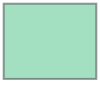

In [110]:
# バウンディングボックスの座標をPolygon(面)に変換
ox.utils_geo.bbox_to_poly(north=35.68697720335493, south=35.668990796645076, east=139.77645957835452, west=139.7543172216455)

In [111]:
# 点を補間
# geom a LineString geometry
# osmnx.utils_geo.interpolate_points(geom, dist)

In [112]:
# ジオメトリの座標を、小数の精度で丸める
# geom : {Point, MultiPoint, LineString, MultiLineString, Polygon, MultiPolygon}
# osmnx.utils_geo.round_geometry_coords(geom, precision)

In [113]:
# 点をランダムにサンプリング
ox.utils_geo.sample_points(G, n=10)

/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:45: UserWarning: graph should be undirected to not oversample bidirectional edges
  warnings.warn("graph should be undirected to not oversample bidirectional edges")
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(np.random.rand(n), normalized=True)


u           v           key
4517379594  4517379593  0      POINT (139.77108 35.67679)
6205397318  5110316649  0      POINT (139.76496 35.67719)
5118822129  5118822130  0      POINT (139.76722 35.67396)
6478314059  6482163135  0      POINT (139.77357 35.68287)
5104706206  5104706208  0      POINT (139.76779 35.67373)
6333133551  3949376508  0      POINT (139.76527 35.67485)
5110298659  5097456195  0      POINT (139.76673 35.67546)
6284558559  6284558556  0      POINT (139.76322 35.67568)
6517977315  6517977321  0      POINT (139.77329 35.67994)
7022642544  6244220910  0      POINT (139.76244 35.67827)
dtype: geometry

### utils_graph module

In [114]:
# MultiDiGraphをDiGraphに変換
# MultiDigraph:多重有向グラフ、Digraph:単純有向グラフ
Gdi = ox.utils_graph.get_digraph(G, weight='length')

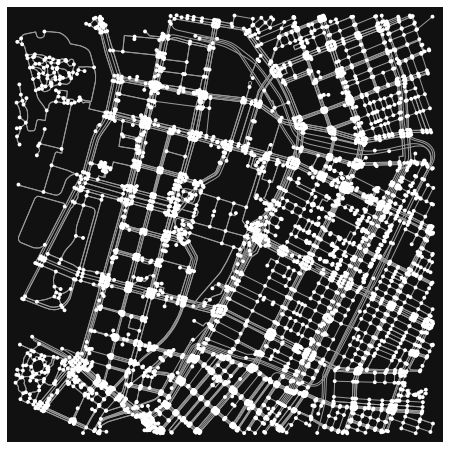

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe95d96a250>)

In [116]:
# Gの最大の弱結合/強結合成分のサブグラフを取得
G_sub = ox.utils_graph.get_largest_component(G, strongly=False)
ox.plot_graph(G_sub)

In [117]:
# パス内のの各エッジの属性値のリストを取得
# routeには最短経路出力時のpathを利用
ox.utils_graph.get_route_edge_attributes(G, route=path, attribute=None, minimize_key='length', retrieve_default=None)

[{'bearing': 7.1,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fe966b11550>,
  'highway': 'motorway_link',
  'lanes': '1',
  'length': 234.71,
  'maxspeed': '40',
  'oneway': True,
  'osmid': 4849052,
  'speed_kph': 40.0,
  'travel_time': 21.1},
 {'bearing': 212.8,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fe96170d610>,
  'highway': 'footway',
  'length': 158.031,
  'oneway': False,
  'osmid': 658506324,
  'speed_kph': 44.0,
  'travel_time': 12.9},
 {'bearing': 273.3,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fe96170d710>,
  'highway': 'footway',
  'length': 4.587,
  'oneway': False,
  'osmid': [525494200, 525494199],
  'speed_kph': 44.0,
  'travel_time': 0.4},
 {'bearing': 304.4,
  'geometry': <shapely.geometry.linestring.LineString at 0x7fe96170d290>,
  'highway': 'footway',
  'length': 6.402,
  'oneway': False,
  'osmid': [525494200, 525494201],
  'speed_kph': 44.0,
  'travel_time': 0.5},
 {'bearing': 238.7,
  'highway': 'footway',


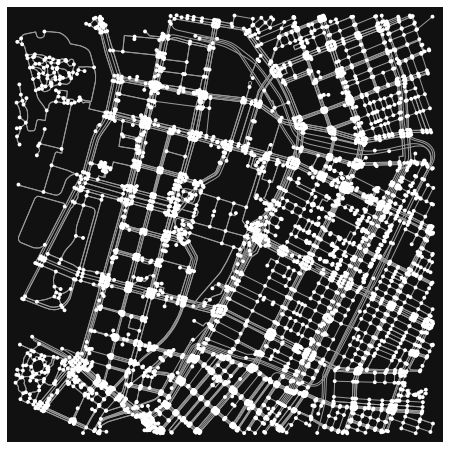

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe95bd97ed0>)

In [119]:
# 入射エッジを持たないすべてのノードを削除
G_rm_isolatedNode = ox.utils_graph.remove_isolated_nodes(G)
ox.plot_graph(G_rm_isolatedNode)